In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [7]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('Catholic Church', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536776974.0
2018-09-12 11:29:34
Pope Francis at Mass: Bishops must pray to overcome 'Great Accuser'
0
2
1536677879.0
2018-09-11 07:57:59
Air Force Chaplain Under Fire For Blaming Gay Priests For Church Abuse Scandals
144
3
1536389682.0
2018-09-07 23:54:42
Vatican officials knew of McCarrick allegations in 2000, letter confirms
635
4
1536190623.0
2018-09-05 16:37:03
Florida priests caught having sex in car, arrested - KTVQ.com
287
5
1536114600.0
2018-09-04 19:30:00
Facing excommunication, former LDS bishop says Mormon leaders could learn from Catholic Church
206
6
1536016291.0
2018-09-03 16:11:31
‘Predatory behavior’: Priest sex abuse report reveals secret Bay Area case
768
7
1535935324.0
2018-09-02 17:42:04
Nebraska Catholic diocese rocked by old abuse allegations
225
8
1535927203.0
2018-09-02 15:26:43
Pope Francis urges action on 'endless fields' of plastic in the world's oceans
1187
9
1535818512.0
2018-09-01 09:15:12
Chilean prosecutors say Church abuse investigations tr

101
1506265914.0
2017-09-24 08:11:54
Auditor says he was forced to quit Vatican after finding irregularities
723
102
1506053395.0
2017-09-21 21:09:55
Michigan sued after gay couples rejected by state-contracted adoption agencies
89
103
1505959886.0
2017-09-20 19:11:26
Mormon Sect Leader Pleads Guilty of Food Stamp Fraud Scheme
202


In [8]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536777e+09,2018-09-12 11:29:34,Pope Francis at Mass: Bishops must pray to ove...,0
1,1.536678e+09,2018-09-11 07:57:59,Air Force Chaplain Under Fire For Blaming Gay ...,144
2,1.536390e+09,2018-09-07 23:54:42,Vatican officials knew of McCarrick allegation...,635
3,1.536191e+09,2018-09-05 16:37:03,"Florida priests caught having sex in car, arre...",287
4,1.536115e+09,2018-09-04 19:30:00,"Facing excommunication, former LDS bishop says...",206
5,1.536016e+09,2018-09-03 16:11:31,‘Predatory behavior’: Priest sex abuse report ...,768
6,1.535935e+09,2018-09-02 17:42:04,Nebraska Catholic diocese rocked by old abuse ...,225
7,1.535927e+09,2018-09-02 15:26:43,Pope Francis urges action on 'endless fields' ...,1187
8,1.535819e+09,2018-09-01 09:15:12,Chilean prosecutors say Church abuse investiga...,90
9,1.535734e+09,2018-08-31 09:49:51,Australian Catholic Church rejects calls for p...,125


In [9]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [10]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,2,1.536390e+09,2018-09-07 23:54:42,Vatican officials knew of McCarrick allegation...,635
1,5,1.536016e+09,2018-09-03 16:11:31,‘Predatory behavior’: Priest sex abuse report ...,768
2,7,1.535927e+09,2018-09-02 15:26:43,Pope Francis urges action on 'endless fields' ...,1187
3,10,1.535411e+09,2018-08-27 16:02:05,Pope Declines to Confirm or Deny Knowledge of ...,803
4,11,1.535328e+09,2018-08-26 16:58:00,Catholic Church makes 500K tickets available f...,2721
5,13,1.535230e+09,2018-08-25 13:47:13,Pope arrives in Ireland for first papal visit ...,1971
6,16,1.535069e+09,2018-08-23 17:01:56,Ex-Michigan State Gymnastics Coach Charged Wit...,478
7,18,1.535005e+09,2018-08-22 23:10:21,An Indiana priest is attacked by a man yelling...,775
8,19,1.534972e+09,2018-08-22 14:13:40,"Priest charged with indecent assault, sending ...",931
9,21,1.534807e+09,2018-08-20 16:23:09,Clergy abuse hotline calls 'surging' after sca...,947


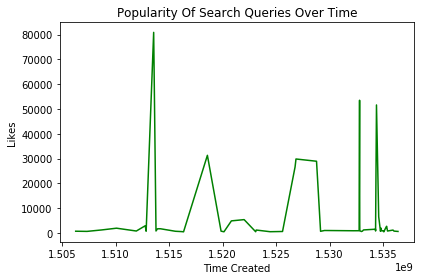

In [11]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()